# Police District Statistics

This notebook compares statistics between the different police districts, and within each district, statistics can be inspected between the individual cars.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import utilityModule # own custom functions

In [2]:
# Constants from analysis
CAR_CAPACITY = 3500

# import car to events assignment from CSV
car_to_events_df = pd.read_csv("../data/oslo/osloCarToEventsAssignment.csv")
car_to_events_df.head(2)

,carNodeID,eventNodeID,distance,travel_time,x,y
0,298865519,10031759215,8483.009,583.2,258909.229127,6.653390e+06
1,298865519,10066708353,4701.698,326.2,249323.607591,6.647828e+06


### Summarize data into tables

In [3]:
# compute district-wide stats
district_stats = utilityModule.compute_district_stats(car_to_events_df)
district_stats

,min,median,mean,max,std,sum,count,percentile_20,percentile_50,percentile_80
0,0.00,5.57,6.05,36.08,3.54,46290.91,7652,3.02,5.57,8.83


In [4]:
# compute within-district stats
within_district_stats = utilityModule.compute_within_district_stats(car_to_events_df, CAR_CAPACITY)
within_district_stats

,carNodeID,min,median,mean,max,std,sum,count,capacity_3500,percentile_20,percentile_50,percentile_80
0,298865519,0.27,7.29,6.93,14.50,2.78,11795.58,1701,48.60,4.22,7.29,9.34
0,10527300,0.00,5.48,5.97,12.89,2.87,11206.22,1877,53.63,3.44,5.48,8.80
0,1497065056,0.06,4.53,4.99,17.41,2.84,17476.39,3500,100.00,2.51,4.53,7.46
0,35977982,0.19,9.05,10.13,36.08,6.53,5812.72,574,16.40,5.77,9.05,12.11


### Visualize district-wide statistics

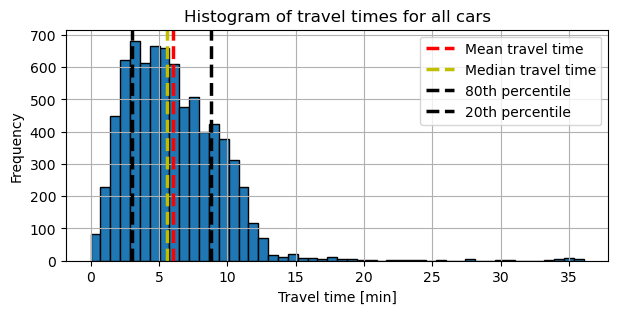

In [5]:
# Histogram
utilityModule.plot_travel_time_histogram_district(car_to_events_df, district_stats, figsize=(7, 3))

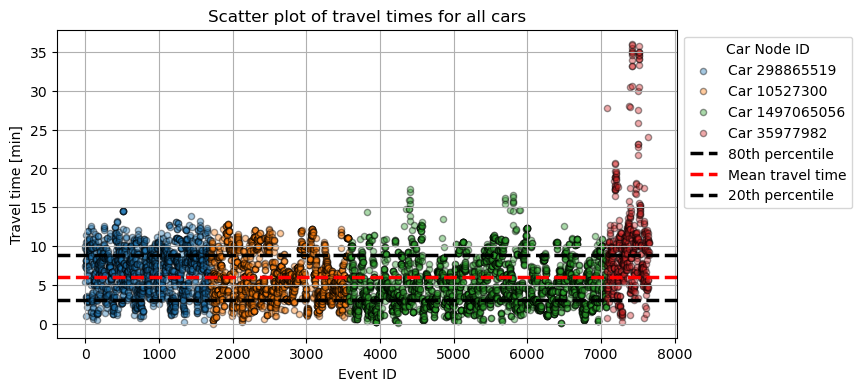

In [6]:
# Scatterplot
utilityModule.plot_travel_time_scatterplot_district(car_to_events_df, district_stats, figsize=(8, 4))

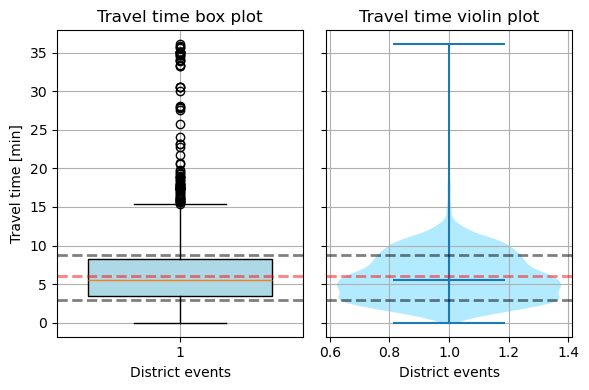

In [7]:
utilityModule.plot_travel_time_box_violin_district(car_to_events_df, district_stats, figsize=(6,4))

### Visual within-district statistics for individual cars

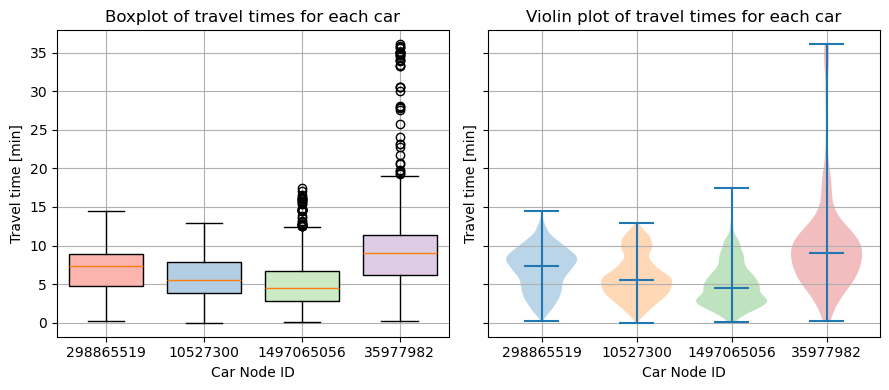

In [8]:
# Boxplot and Violinplot
utilityModule.plot_travel_time_box_violin_cars(car_to_events_df, figsize=(9, 4))